In [160]:
from PIL import Image

### Regularization

Regularization is a technique used for tuning the function by adding an additional penalty term in the error function. The additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values **preventing OVERFITTING**.


Control total changes (or error term i.e $\Delta E_m\;and\;\Delta E_c$) and Control degree of freedom of m and c through adjusting error terms i.e. $\frac{dR}{dm}\;and\; \frac{dR}{dc}$


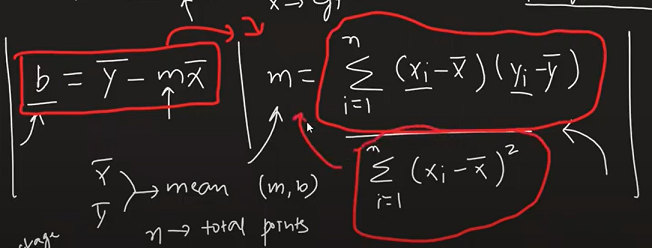

##### Overfitting
In Overfitting, model is performing extremly well in training data but not in testing data.

It has Low Bias and High variance


##### In case of Linear Regression:

$y\;=\;mx\;+\;c$

and for overfitting the weightage/value of m on y will be too high and is of importance.

## Ridge regularization (L-2)

$$Error\ or \ Cost \;Function\;=\;\sum_{i=1}^{n}\;(y_i\;-\;\hat y_i)^2$$


in Regularization we add some extra thing in the Cost Function which is $\lambda(m^2)$

$$Error\;=\;\sum_{i=1}^{n}\;(y_i\;-\;\hat y_i)^2\;+\;\lambda(m^2)$$

$\lambda$ is a hyperparameter which ranges from 0 to $\infty$

m is slope

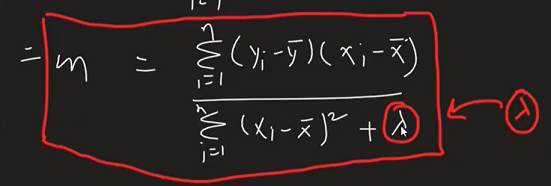

In Ridge regression equation for "c" will be same as that for Linear Regression.


But slope changes as we divide the slope by $\lambda$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X = data.data
y = data.target

In [5]:
X.shape, y.shape

((442, 10), (442,))

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

### First doing without applying Ridge regression

In [8]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [9]:
L.fit(X_train,y_train)

LinearRegression()

In [10]:
print(L.coef_)
print(L.intercept_)

[  23.45388514 -247.43107084  492.10188174  329.36498638 -970.79784704
  573.54460121  182.41386124  255.9162021   794.21654496   89.32074078]
152.13619339070766


In [11]:
y_pred = L.predict(X_test)

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188118914964635
RMSE 48.727108291414


### now, applying Ridge-Regression

In [13]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000) # alpha and lambda of ridge are same

In [14]:
R.fit(X_train,y_train)

Ridge(alpha=100000)

In [15]:
print(R.coef_)
print()
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.00609765  0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734601  0.00528629]
151.8328793076644


In [16]:
y_pred1 = R.predict(X_test)

In [17]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.0004249020401270176
RMSE 70.25956273043168


### another example : Polynomial regression with different alpha value (Ridge) 

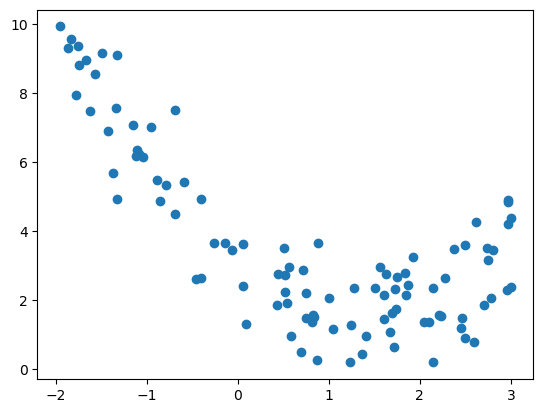

In [18]:
# generating data
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

#### applying different alphas:

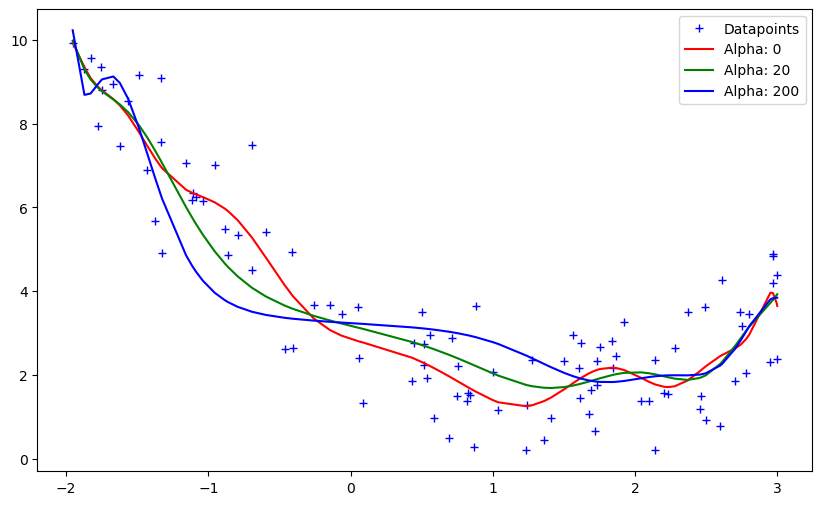

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

- alpha 0 is Overfitting



- alpha 200 is Underfitting

### comparing normal ridge with our ridge class : 

#### using different alpha values (Ridge regression) :

In [35]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [36]:
X,y = make_regression(n_samples = 100, n_features = 1, n_informative=1, n_targets=1, noise=20, random_state=13)

# 1 input and 1 output column

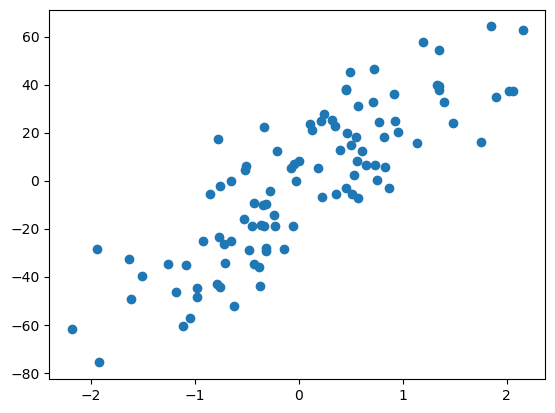

In [37]:
plt.scatter(X,y)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [40]:
lr.coef_

array([27.82809103])

In [41]:
lr.intercept_

-2.29474455867698

In [42]:
from sklearn.linear_model import Ridge

In [43]:
rr = Ridge(alpha=10)
rr.fit(X,y)


Ridge(alpha=10)

In [44]:
rr.coef_
# slope decreased from 27 to 24

array([24.9546267])

In [45]:
rr.intercept_

-2.126913003523573

In [46]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)

Ridge(alpha=100)

In [47]:
rr1.coef_

# by increasing the alpha to 100, slope changed from 24 to 12.93

array([12.93442104])

In [48]:
rr1.intercept_

-1.4248441496033308

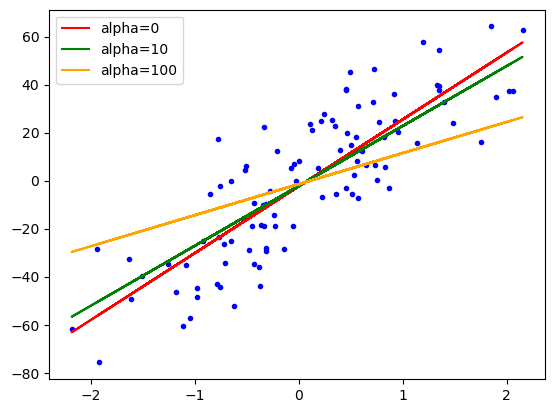

In [49]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0') # without applying ridge
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

### Creating Ridge Regression from Scratch

In [50]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.c = None
        
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)  # alpha will be added outside the loop
        self.c = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.c)
    
    def predict(self,X_test):
        pass

In [51]:
reg = MeraRidge(alpha=0)

In [52]:
reg.fit(X,y)

# works same as Linear Regression

[27.82809103] [-2.29474456]


In [53]:
reg = MeraRidge(alpha=10)

In [54]:
reg.fit(X,y)

# same value of coef_ and intercept_

[24.9546267] [-2.126913]


In [55]:
reg = MeraRidge(alpha=100)

In [56]:
reg.fit(X,y)

# same value of coef_ and intercept_

[12.93442104] [-1.42484415]


### Ridge Regression for n-d Data

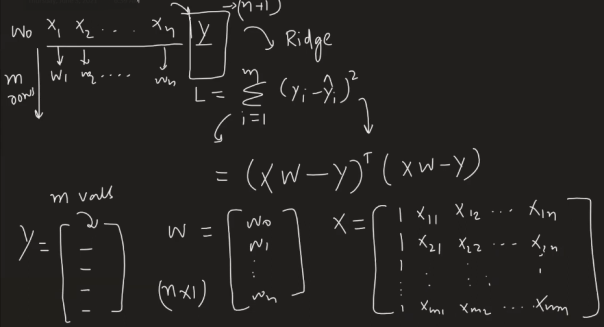

In matrix-form Loss function for normal Linear Regression $\longrightarrow(XW-Y)^T(XW-Y)$


Y is the matrix with Output Column
<br></br>

Now, __Loss function for normal Linear Regression using Ridge__ $\longrightarrow(XW-Y)^T(XW-Y)\;+\;\lambda ||W||^2$

where $\lambda ||W||^2\;=\; \lambda\;(W_{0}^2\;+\;W_{1}^2\;+\;W_{2}^2\;+.......+\; W_{n}^2)$

<br></br>
__Same equation in **Matrix form** for Linear Regression using Ridge__ $\longrightarrow\;(XW-Y)^T(XW-Y)\;+\;\lambda W^TW$
<br></br>

Differentiating this matrix equation with respect to W i.e. $\frac{dL}{dW}\;:\;W\;=\;(X^TX\;+\;\lambda I)^{-1} X^TY$

where I is Identity Matrix




$$\text{Final equation}\;\;\Longrightarrow \;\;W = (X^TX)^{-1}X^TY$$

$\Longrightarrow$ Matrix Differentiation : http://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf

### Creating Ridge Regression for n-dim data (but using closed form solution i.e solver = 'cholesky' )

In [57]:
from sklearn.datasets import load_diabetes

In [58]:
from sklearn.metrics import r2_score

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
X,y = load_diabetes(return_X_y=True)

In [61]:
from sklearn.model_selection import train_test_split


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [63]:
from sklearn.linear_model import Ridge 

In [64]:
reg = Ridge(alpha=0.1, solver = 'cholesky')

In [65]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [66]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.46930668289209754

In [67]:
reg.coef_

array([  44.02025512, -241.69666596,  452.98163524,  332.04993719,
        -76.34010147,  -68.52063199, -164.98817213,  149.9687712 ,
        431.61985919,   58.51762582])

In [68]:
reg.intercept_

150.89050209333024

#### creating our class now : will give problem for bigger dataset as we are using closed form solution

$$\text{Final equation}\;\;\Longrightarrow \;\;W = (X^TX)^{-1}X^TY$$

In [69]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1) # inserting 1 value in 1st row
        
        I = np.identity(X_train.shape[1]) # identity matrix 
        
        I[0][0] = 0 # doing identity matrix first term as 0 bcoz same is happening in Original Ridge Regressor 
                    # as we dont want to apply this logic on intercept coefficient
        
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [215]:
reg = MeraRidge()

In [216]:
reg.fit(X_train,y_train)

In [217]:
y_pred = reg.predict(X_test)

In [218]:
r2_score(y_test,y_pred)

0.46931288533098037

In [219]:
reg.coef_

# getting same coef values

array([  44.02063391, -241.69329987,  452.98665299,  332.04420177,
        -76.33686744,  -68.52143809, -164.98809083,  149.96908118,
        431.61347417,   58.51862681])

In [220]:
reg.intercept_

150.8905342560281

### Applying Gradient Descent in Ridge Regression

$$\frac{dL}{dW}\;=\; X^TXW\;-\;X^TY\;-\;\lambda W$$

In [70]:
from sklearn.datasets import load_diabetes

In [71]:
from sklearn.metrics import r2_score 

In [72]:
import numpy as np

In [73]:
X,y = load_diabetes(return_X_y=True)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test,  y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=4)

### using SGD regressor, `penalty = 'l2'`

In [76]:
from sklearn.linear_model import SGDRegressor

In [77]:
reg = SGDRegressor(penalty = 'l2',max_iter=500,  eta0 = 0.1,learning_rate='constant',alpha = 0.001) 

# learning rate = 0.1
# lambda = 0.001

In [78]:
reg.fit(X_train,y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [79]:
y_pred = reg.predict(X_test)

In [80]:
r2_score(y_test,y_pred)

0.4466842978886204

In [81]:
reg.coef_

array([  50.25959045, -155.28193373,  369.6215484 ,  268.58450473,
         -4.37199251,  -56.21019152, -168.67120613,  137.43717825,
        329.0083259 ,   96.93934572])

In [82]:
reg.intercept_

array([164.9882338])

### now using Ridge (OLS), solver = 'sparse_cg'

In [83]:
from sklearn.linear_model import Ridge

In [84]:
reg = Ridge(alpha = 0.001, max_iter=500, solver = 'sparse_cg')

In [85]:
reg.fit(X_train,y_train)

Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [86]:
y_pred = reg.predict(X_test)

In [87]:
r2_score(y_test,y_pred)

0.4623892201785499

In [88]:
reg.coef_

array([  34.62617432, -290.42643558,  483.96594583,  367.96559731,
       -852.21640462,  498.74459946,  183.78210202,  276.57704129,
        757.34559547,   36.95860459])

In [89]:
reg.intercept_

151.10416921897937

### creating own class for Gradient Descent

In [241]:
class MeraRidgeGD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [242]:
reg = MeraRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [243]:
reg.fit(X_train,y_train)

In [244]:
y_pred = reg.predict(X_test)

In [245]:
r2_score(y_test,y_pred)

0.4738018280260913

In [246]:
reg.coef_

array([  46.65050914, -221.3750037 ,  452.12080647,  325.54248128,
        -29.09464178,  -96.47517735, -190.90017011,  146.32900372,
        400.80267299,   95.09048094])

In [247]:
reg.intercept_

150.86975316713472

## 5 Key Takeaway from Ridge Regression

### 1. How are coefficients affected?

In [248]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [249]:
data = load_diabetes()

In [250]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

In [251]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [252]:
df.shape

(442, 11)

In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [254]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [255]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]: # for 4 different values of lambda
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    

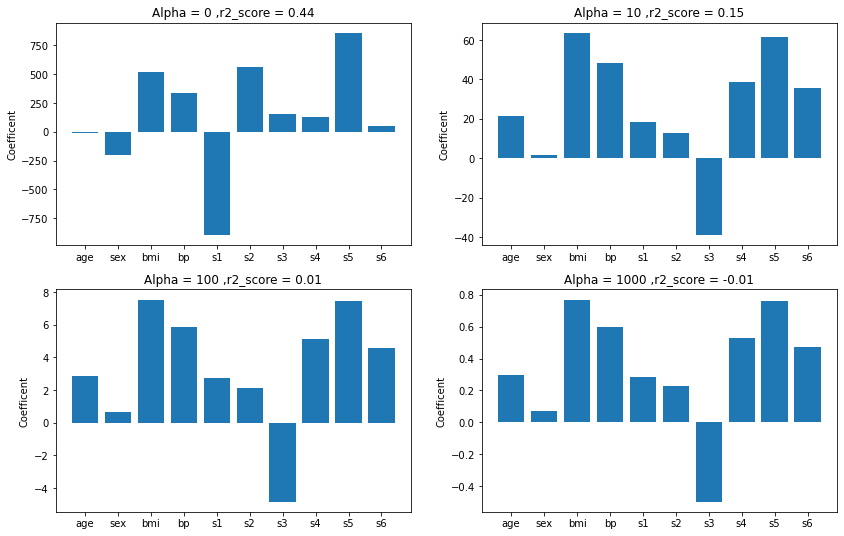

In [256]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.ylabel('Coefficent')
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.ylabel('Coefficent')
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.ylabel('Coefficent')
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.ylabel('Coefficent')
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

#### After applying Ridge regression, when increasing value of lambda the coefficients of each column starts to shrink. They tends towards zero but doesn't attains zero

### 2. Higher Coefficients are affected more

In [257]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [258]:
input_array = np.array(coefs)

In [259]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                   
0.0000      -9.158653 -205.454322  516.693745  340.619999 -895.552002   
0.0001      -9.116119 -205.329219  516.889664  340.549436 -883.423872   
0.0010      -8.761487 -204.313404  518.380608  339.967926 -787.700510   
0.0100      -6.399507 -198.662945  522.056516  336.340595 -383.717571   
0.1000       6.643733 -172.237474  485.529585  314.675846  -72.940209   
1.0000      42.242528  -57.304483  282.172125  198.059395   14.363734   
10.0000     21.174024    1.659837   63.659826   48.492858   18.421510   
100.0000     2.858980    0.629453    7.540605    5.849949    2.710879   
1000.0000    0.295726    0.069290    0.769004    0.597824    0.282900   
10000.0000   0.029674    0.006995    0.077054    0.059914    0.028412   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.220679  153.893110  126.731397  861.127002  52.421122  
0.0001      551.559582  148.587063  125.353015  856.485935  52.468916  
0.0010      475.282181  106.795253  114.629265  819.745723  52.873349  
0.0100      152.670882  -66.053243   75.608209  659.875219  55.829221  
0.1000      -80.588688 -174.463527   83.614710  484.365316  73.585091  
1.0000      -22.551079 -136.929684  102.023069  260.104294  98.552692  
10.0000      12.875466  -38.915435   38.842475   61.612302  35.505383  
100.0000      2.142135   -4.834047    5.108223    7.448451   4.576129  
1000.0000     0.225936   -0.495607    0.527031    0.761496   0.471029  
10000.0000    0.022715   -0.049686    0.052870    0.076321   0.047241

#### Jis coefficent ka value jitna zyada vlaue hoga, after applying Ridge, woh utni tezi se shrink hoga. 

#### Effect of higher lambda will be more on higher weightage coefficents in comparison to the coefficents with lesser weightage

In [260]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [261]:
input_array = np.array(coefs).T

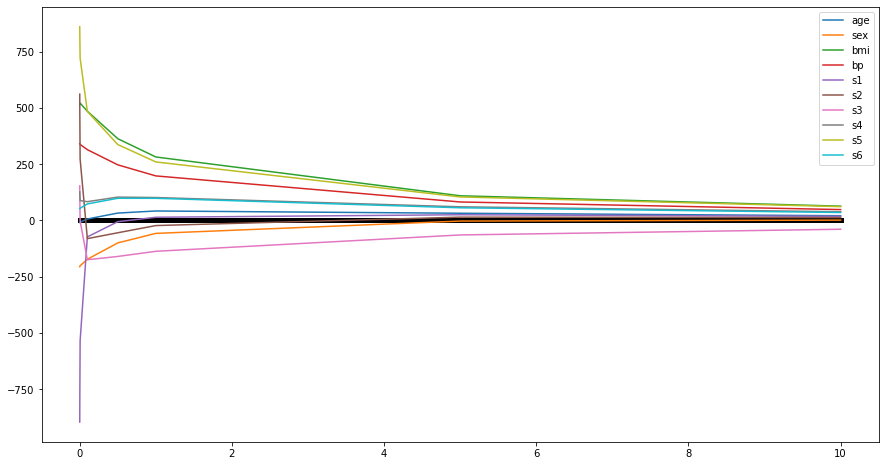

In [262]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

### 3. Impact on Bias and Variance

In [ ]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=16)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [ ]:
from mlxtend.evaluate import bias_variance_decomp # using mlxtend library
 
alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

In [ ]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

- $\lambda \downarrow$

    - $Bias\;\downarrow\;\;Overfit\;\;Variance\;\uparrow$
    
<br></br>    
- $\lambda \uparrow$

    - $Bias\;\uparrow\;\;Underfit\;\;Variance\;\downarrow$
    
    
    
$$\lambda\;\propto\;BIAS$$

$$\lambda\;\propto\;\frac{1}{VARIANCE}$$

### 4. Effect of Regularization on Loss Function

In [1]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

NameError: name 'plt' is not defined

In [269]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [270]:
def predict(m):
    return m*X - 2.29

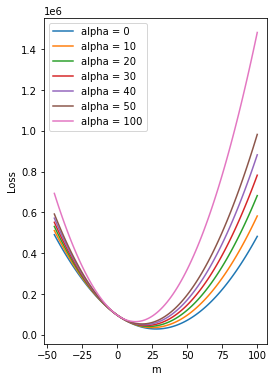

In [271]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]: # for different lambda values
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()

**With increase in value of $\lambda\;(alpha)$ we can see that the coefficents are shrinking and tending to zero.**

#### for 2 coefficients
<img src='https://explained.ai/regularization/images/lagrange-animation.gif'>

#### Loss function is shifting towards centre,

### 5. Why Ridge Regression is called Ridge?

Hard Constraint Ridge Regression

Loss Function is a combination of 2 things: 

MSE $(y-\hat y)^2\;\;+\;\;\lambda ||W||^2$

so $(y-\hat y)^2 = \sum_{i}^{n}\;(y_i\;-\;(\beta_{0}\;+\;\beta_{1}x_{i1}\;+\;\beta_{2}x_{i2})^2\longrightarrow\;MSE\;(OLS\;Estimate)$ Contour Plot

and

$\lambda\;(\beta_{1}^2\;+\;\beta_{2}^2)\;\longrightarrow$ blue circle 


**So depending on the Loss function the solution will always be on the perimeter of blue circle and closet to the contuor plot.**

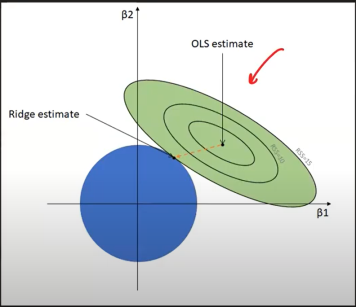

#### NOTE: Use Ridge when number of columns is 2 or greater.

***

## LASSO REGRESSION (L-1)

$$Loss\;=\;MSE\;+\;\lambda\;\sum_{i=1}^{n}\;|W|$$

where $\lambda |W|\;=\;\lambda\;\bigg[|W_{1}|\;+\;|W_{2}|\;+|W_{3}|\;+......+\;|W_{n}|\bigg]$

#### Sklearn Lasso

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [274]:
from sklearn.linear_model import Lasso

In [275]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 

In [276]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=1)

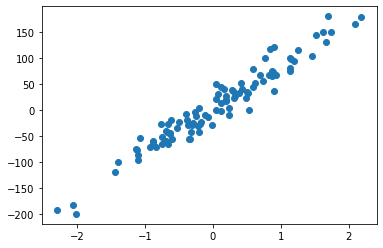

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

In [278]:
from sklearn.linear_model import LinearRegression

In [279]:
reg = LinearRegression()

In [280]:
reg.fit(X_train,y_train)

LinearRegression()

In [281]:
y_pred = reg.predict(X_test)

In [282]:
from sklearn.metrics import r2_score

In [283]:
r2_score(y_test,y_pred)

0.9628026756088767

In [284]:
reg.coef_

array([83.03177319])

In [285]:
reg.intercept_

3.960858989988745

C:\Users\MOHIT~1.KUM\AppData\Local\Temp/ipykernel_14544/2264418426.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train,y_train)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e+04, tolerance: 4.334e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_d

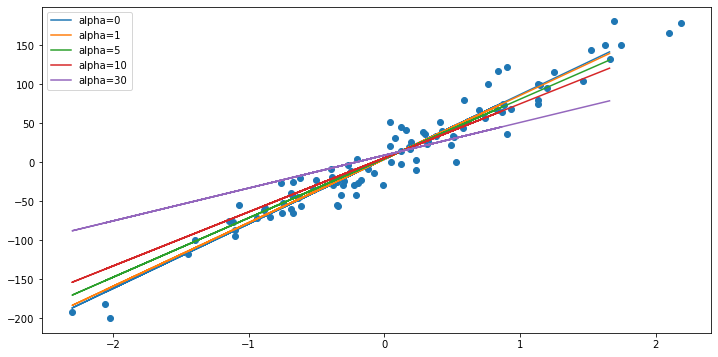

In [286]:
# for different alpha values
alphas = [0,1,5,10,30]

plt.figure(figsize=(12,6))
plt.scatter(X,y)

for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()

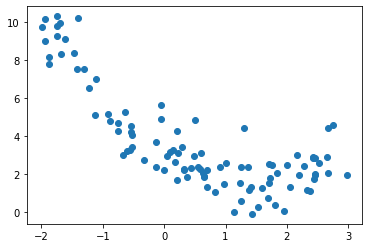

In [287]:
# creating data for polnomial regression
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m,1)

plt.scatter(x1, x2)
plt.show()

In [288]:
# polynomial Regression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.186e+01, tolerance: 6.994e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.


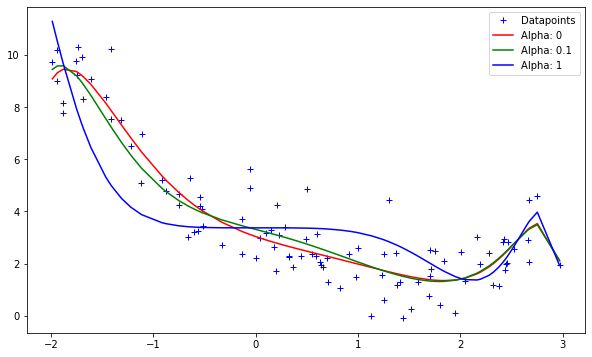

In [289]:
def get_preds_lasso(x1, x2, alpha):
    
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,0.1,1]
cs = ['r','g','b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label = 'Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

### 4 Key points for Lasso Regression

### 1. How are coefficients affected?

In [290]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [291]:
data = load_diabetes()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [292]:
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [293]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

C:\Users\MOHIT~1.KUM\AppData\Local\Temp/ipykernel_14544/2282175565.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train,y_train)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate

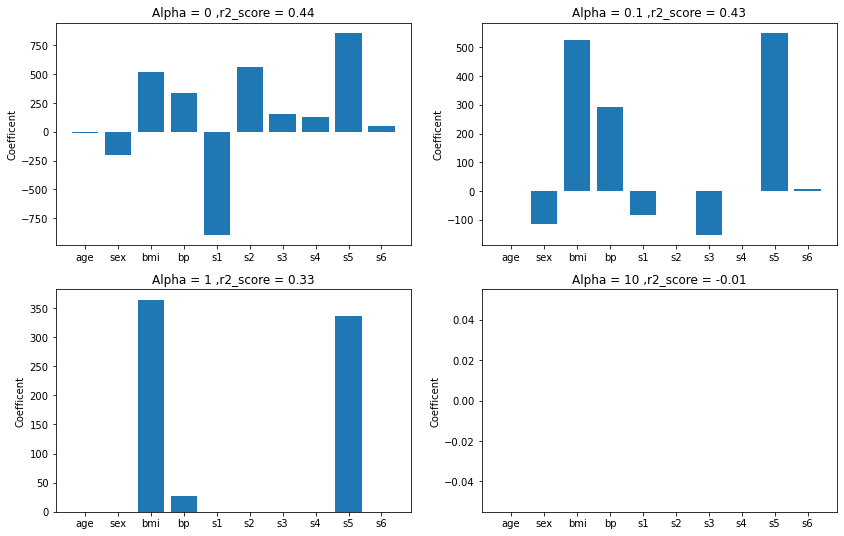

In [294]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.ylabel('Coefficent')
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.ylabel('Coefficent')
plt.title('Alpha = 0.1 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.ylabel('Coefficent')
plt.title('Alpha = 1 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.ylabel('Coefficent')
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

#### In Lasso Regression the coefficents can become 0 for higher values of $\lambda\;(alpha)$ whereas in Ridge it used to only tend towards zero.

### 2. Higher Coefficients are affected more

In [295]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\MOHIT~1.KUM\AppData\Local\Temp/ipykernel_14544/3629677300.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train,y_train)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate

In [296]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                  
0.0000     -9.158653 -205.454322  516.693745  340.619999 -895.551989   
0.0001     -9.069064 -205.329406  516.789418  340.532379 -888.660904   
0.0010     -8.262770 -204.205364  517.650073  339.743901 -826.663603   
0.0100     -1.359721 -192.937180  526.356514  332.641101 -430.226975   
0.1000      0.000000 -113.969928  526.744396  292.628472  -82.693681   
1.0000      0.000000    0.000000  363.885742   27.273163    0.000000   
10.0000     0.000000    0.000000    0.000000    0.000000    0.000000   
100.0000    0.000000    0.000000    0.000000    0.000000    0.000000   
1000.0000   0.000000    0.000000    0.000000    0.000000    0.000000   
10000.0000  0.000000    0.000000    0.000000    0.000000    0.000000   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      561.220669  153.893104  126.731395  861.126997  52.421122  
0.0001      555.958584  150.593655  125.450143  858.645541  52.380294  
0.0010      508.617395  120.908607  113.921773  836.320753  52.012849  
0.0100      191.295480  -44.034913   68.988987  688.396028  47.940616  
0.1000       -0.000000 -152.685338    0.000000  551.080291   7.170992  
1.0000        0.000000   -0.000000    0.000000  336.137262   0.000000  
10.0000       0.000000   -0.000000    0.000000    0.000000   0.000000  
100.0000      0.000000   -0.000000    0.000000    0.000000   0.000000  
1000.0000     0.000000   -0.000000    0.000000    0.000000   0.000000  
10000.0000    0.000000   -0.000000    0.000000    0.000000   0.000000

#### Higher value of $\lambda$ causes Sparcity i.e. m becomes zero for all independent variables causing Underfitting

In [297]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

C:\Users\MOHIT~1.KUM\AppData\Local\Temp/ipykernel_14544/2481455600.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train,y_train)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate

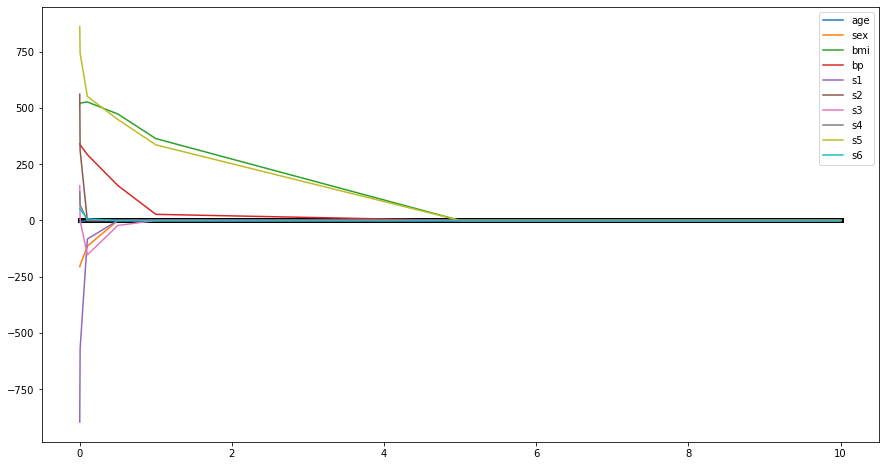

In [298]:
input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

#### Jis coefficent ka value jitna zyada vlaue hoga, after applying Lasso also, woh utni tezi se shrink hoga. 

#### Effect of higher lambda will be more on higher weightage coefficents in comparison to the coefficents with lesser weightage

### 3. Impact on Bias and Variance

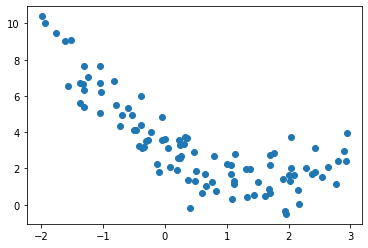

In [299]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [300]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [301]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [302]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\mlxtend\evaluate\bias_variance_decomp.py:131: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  pred = estimator.fit(X_boot, y_boot, **fit_params).predict(X_test)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.651e+01, tolerance: 3.842e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.519e+01, tolerance: 3.314e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\mlxtend\evaluate\bias_variance_decomp.py:131: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  pred = estimator.fit(X_boot, y_boot, **fit_params).predict(X_test)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpect

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.836e+01, tolerance: 3.228e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\mlxtend\evaluate\bias_variance_decomp.py:131: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  pred = estimator.fit(X_boot, y_boot, **fit_params).predict(X_test)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpect

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.500e+01, tolerance: 3.638e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\mlxtend\evaluate\bias_variance_decomp.py:131: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  pred = estimator.fit(X_boot, y_boot, **fit_params).predict(X_test)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpect

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.779e+01, tolerance: 4.240e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\mlxtend\evaluate\bias_variance_decomp.py:131: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\mlxtend\evaluate\bias_variance_decomp.py:131: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  pred = estimator.fit(X_boot, y_boot, **fit_params).predict(X_test)
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.319e+01, tolerance: 5.989e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.115e+01, tolerance: 4.123e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.032e+01, tolerance: 4.206e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.154e+01, tolerance: 4.005e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.879e+01, tolerance: 4.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.135e+01, tolerance: 3.661e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.978e+01, tolerance: 4.349e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.184e+01, tolerance: 3.986e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.027e+01, tolerance: 3.954e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.117e+01, tolerance: 4.751e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.760e+01, tolerance: 3.971e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.142e+01, tolerance: 3.601e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.083e+00, tolerance: 3.637e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.528e+01, tolerance: 3.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.071e+01, tolerance: 4.102e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+01, tolerance: 3.778e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.717e+01, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.687e+01, tolerance: 4.474e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.997e+01, tolerance: 3.276e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.344e+01, tolerance: 4.189e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.088e+01, tolerance: 4.123e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.021e+01, tolerance: 4.195e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.743e+01, tolerance: 4.170e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.097e+01, tolerance: 3.778e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.809e+01, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.836e+01, tolerance: 3.681e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.787e+01, tolerance: 4.593e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.866e+01, tolerance: 4.189e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.514e+01, tolerance: 4.123e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.580e+01, tolerance: 3.660e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.593e+01, tolerance: 3.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.087e+01, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.655e+01, tolerance: 4.287e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.175e+01, tolerance: 4.593e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+02, tolerance: 5.024e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.448e+01, tolerance: 4.895e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.692e+01, tolerance: 5.101e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.807e+01, tolerance: 3.919e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.840e+01, tolerance: 5.256e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.070e+02, tolerance: 4.518e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+02, tolerance: 4.630e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.170e+01, tolerance: 4.563e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.479e+01, tolerance: 5.904e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.030e+01, tolerance: 4.184e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.177e+01, tolerance: 4.670e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.785e+01, tolerance: 3.850e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.543e+01, tolerance: 3.228e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.401e+01, tolerance: 3.427e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.365e+01, tolerance: 3.687e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.731e+01, tolerance: 5.051e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.867e+01, tolerance: 3.150e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.829e+01, tolerance: 3.667e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.395e+01, tolerance: 3.815e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.278e+00, tolerance: 4.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.740e+01, tolerance: 5.536e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.344e+01, tolerance: 3.447e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.920e+01, tolerance: 4.279e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.714e+01, tolerance: 5.183e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.923e+01, tolerance: 5.051e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.705e+01, tolerance: 3.667e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.210e+01, tolerance: 3.815e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.880e+01, tolerance: 3.919e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.789e+01, tolerance: 5.256e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.976e+01, tolerance: 5.071e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.221e+01, tolerance: 3.036e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.044e+01, tolerance: 3.681e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.733e+01, tolerance: 4.593e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.433e+01, tolerance: 3.999e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.607e+00, tolerance: 4.189e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.889e+00, tolerance: 3.660e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.692e+01, tolerance: 3.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.276e+01, tolerance: 5.578e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.674e+01, tolerance: 3.333e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.541e+01, tolerance: 3.634e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.849e+01, tolerance: 3.389e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.607e+01, tolerance: 3.884e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.579e+01, tolerance: 5.152e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.178e+01, tolerance: 4.900e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.103e+01, tolerance: 3.962e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.482e+01, tolerance: 4.802e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.267e+01, tolerance: 5.195e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.048e+01, tolerance: 3.603e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.019e+00, tolerance: 3.869e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.935e+01, tolerance: 3.034e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.687e+01, tolerance: 5.380e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.792e+01, tolerance: 3.638e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.113e+01, tolerance: 3.447e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.881e+01, tolerance: 3.150e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.132e+01, tolerance: 5.172e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.706e+01, tolerance: 3.999e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.639e+00, tolerance: 4.189e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.924e+00, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.043e+01, tolerance: 4.195e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.420e+01, tolerance: 3.427e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.393e+01, tolerance: 3.687e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.492e+01, tolerance: 4.128e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.948e+01, tolerance: 4.129e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.298e-01, tolerance: 3.949e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.326e+01, tolerance: 4.889e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+01, tolerance: 6.181e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+01, tolerance: 5.154e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.617e-01, tolerance: 3.660e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+01, tolerance: 3.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.338e+01, tolerance: 3.427e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+01, tolerance: 3.687e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.545e+01, tolerance: 3.150e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.399e+01, tolerance: 5.172e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.479e+00, tolerance: 3.869e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.934e+00, tolerance: 5.289e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.233e+00, tolerance: 3.541e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.181e+01, tolerance: 4.005e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.707e+01, tolerance: 4.900e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.850e+01, tolerance: 3.962e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.133e+01, tolerance: 4.277e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.013e+01, tolerance: 3.986e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.420e-01, tolerance: 3.488e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.502e+00, tolerance: 5.989e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.254e+00, tolerance: 5.101e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.909e+01, tolerance: 3.999e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.935e+01, tolerance: 5.162e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.904e+00, tolerance: 5.238e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.869e+01, tolerance: 4.380e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.746e+00, tolerance: 3.808e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.769e+00, tolerance: 4.443e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e+00, tolerance: 4.992e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.669e+01, tolerance: 3.864e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.498e+01, tolerance: 3.667e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.928e+01, tolerance: 4.126e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.847e-01, tolerance: 3.944e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.509e+00, tolerance: 6.416e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.999e+00, tolerance: 4.294e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.642e-01, tolerance: 4.563e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.336e+01, tolerance: 5.904e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.759e+00, tolerance: 5.101e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.526e+01, tolerance: 3.999e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.362e+00, tolerance: 4.395e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.210e+00, tolerance: 5.205e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e+01, tolerance: 5.578e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.994e+01, tolerance: 3.333e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.545e+01, tolerance: 4.567e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.962e-01, tolerance: 4.751e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.927e+00, tolerance: 7.066e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.342e+00, tolerance: 5.382e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+01, tolerance: 5.185e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.995e+00, tolerance: 4.900e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.381e+01, tolerance: 3.954e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+01, tolerance: 4.240e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.910e-01, tolerance: 3.341e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.020e+00, tolerance: 5.672e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.327e+01, tolerance: 5.152e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.488e+01, tolerance: 4.515e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.130e+01, tolerance: 4.867e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.124e+01, tolerance: 4.499e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.299e-01, tolerance: 4.751e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.766e+01, tolerance: 3.971e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.984e+01, tolerance: 2.854e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.447e+01, tolerance: 4.380e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.116e+01, tolerance: 3.389e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.431e+00, tolerance: 3.488e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.067e-01, tolerance: 2.836e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.837e+01, tolerance: 3.526e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.022e+00, tolerance: 4.900e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.863e+01, tolerance: 3.962e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.361e+01, tolerance: 5.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.434e+01, tolerance: 4.802e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.386e+01, tolerance: 4.415e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.277e+01, tolerance: 3.289e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.835e+01, tolerance: 5.162e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.503e+01, tolerance: 5.238e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.003e+01, tolerance: 4.518e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.806e+00, tolerance: 4.630e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.161e+01, tolerance: 4.593e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.258e+01, tolerance: 5.024e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.174e+00, tolerance: 5.154e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.083e+00, tolerance: 4.890e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.646e+01, tolerance: 3.631e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.349e+01, tolerance: 4.114e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.565e+01, tolerance: 3.227e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.513e+01, tolerance: 4.277e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.152e+01, tolerance: 3.076e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.508e-01, tolerance: 3.341e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.011e+01, tolerance: 3.526e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.806e+01, tolerance: 4.135e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.024e+01, tolerance: 2.854e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.074e+01, tolerance: 4.380e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.123e+01, tolerance: 4.992e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.228e+01, tolerance: 5.736e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.022e+01, tolerance: 3.864e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.484e+01, tolerance: 3.667e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.850e+01, tolerance: 3.919e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.146e+01, tolerance: 5.256e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.953e+01, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.743e+01, tolerance: 3.778e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.942e+01, tolerance: 5.989e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.625e+01, tolerance: 4.567e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.070e+01, tolerance: 5.051e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.677e+01, tolerance: 4.240e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.933e+01, tolerance: 4.900e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.312e+01, tolerance: 3.962e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.089e+01, tolerance: 4.802e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.496e+01, tolerance: 5.195e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.279e+01, tolerance: 4.583e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.612e+01, tolerance: 4.846e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.286e+01, tolerance: 3.546e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.606e+01, tolerance: 5.162e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.905e+01, tolerance: 5.510e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.682e+01, tolerance: 3.427e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.456e+01, tolerance: 4.366e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.305e+01, tolerance: 5.020e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.874e+01, tolerance: 5.101e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.290e+01, tolerance: 3.999e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.524e+01, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.290e+01, tolerance: 4.170e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.103e+01, tolerance: 4.754e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.932e+01, tolerance: 4.609e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.244e+01, tolerance: 4.889e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.497e+01, tolerance: 4.050e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.742e+01, tolerance: 3.961e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.309e+01, tolerance: 3.884e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.160e+01, tolerance: 4.900e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.906e+01, tolerance: 3.962e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.828e+01, tolerance: 3.600e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.490e+01, tolerance: 3.783e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.592e+01, tolerance: 4.174e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.091e+01, tolerance: 4.095e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.279e+01, tolerance: 4.854e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.358e+01, tolerance: 4.126e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.048e+01, tolerance: 4.630e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.263e+01, tolerance: 5.263e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.829e+01, tolerance: 5.791e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.910e+01, tolerance: 3.375e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.886e+01, tolerance: 3.409e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.812e+00, tolerance: 3.601e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.988e+01, tolerance: 4.279e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.766e+01, tolerance: 4.559e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.398e+01, tolerance: 3.986e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.594e+01, tolerance: 3.954e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.772e+01, tolerance: 4.583e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.445e+01, tolerance: 4.846e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.135e+01, tolerance: 5.380e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.182e+01, tolerance: 3.546e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.126e+01, tolerance: 3.687e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.898e+01, tolerance: 6.416e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.697e+01, tolerance: 3.488e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.125e+01, tolerance: 5.989e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.553e+01, tolerance: 7.066e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.162e+01, tolerance: 5.382e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.667e+01, tolerance: 4.867e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.786e+01, tolerance: 4.499e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.166e+01, tolerance: 5.020e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.552e+01, tolerance: 4.563e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.539e+01, tolerance: 4.670e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.516e+01, tolerance: 4.613e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.675e+01, tolerance: 4.854e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+01, tolerance: 4.126e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.026e+01, tolerance: 4.630e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.124e+01, tolerance: 5.263e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.743e+01, tolerance: 5.791e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.073e+01, tolerance: 3.375e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.938e+01, tolerance: 2.564e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.116e+01, tolerance: 5.519e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.687e+01, tolerance: 4.559e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.472e+01, tolerance: 6.209e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.774e+01, tolerance: 6.041e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.094e+01, tolerance: 5.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.261e+01, tolerance: 2.437e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.276e+01, tolerance: 4.174e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.516e+01, tolerance: 4.600e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.809e+01, tolerance: 4.854e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.350e+01, tolerance: 3.036e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.988e+01, tolerance: 4.518e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.387e+01, tolerance: 3.681e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+01, tolerance: 4.593e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.910e+01, tolerance: 4.890e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.111e+01, tolerance: 3.399e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.886e-01, tolerance: 4.012e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.487e+01, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.711e+01, tolerance: 3.202e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.244e+01, tolerance: 4.836e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e+01, tolerance: 2.437e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.426e+01, tolerance: 4.174e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.579e+01, tolerance: 5.162e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.182e+01, tolerance: 5.238e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.968e-01, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.804e+01, tolerance: 3.778e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.816e+01, tolerance: 3.634e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.204e+01, tolerance: 3.389e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.934e+01, tolerance: 2.564e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.494e+01, tolerance: 5.519e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.307e+01, tolerance: 5.422e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.471e-01, tolerance: 4.012e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.161e+01, tolerance: 5.195e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+01, tolerance: 3.202e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.101e+01, tolerance: 4.095e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.261e+01, tolerance: 4.415e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.006e+01, tolerance: 4.600e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.977e+01, tolerance: 4.854e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.030e+01, tolerance: 4.630e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.973e+01, tolerance: 5.263e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.976e+01, tolerance: 4.593e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.122e+01, tolerance: 5.024e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.427e+01, tolerance: 3.637e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.824e+01, tolerance: 2.564e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.788e+01, tolerance: 5.422e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e-01, tolerance: 4.012e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.541e+01, tolerance: 4.836e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.136e+01, tolerance: 4.128e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.142e+01, tolerance: 3.289e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.663e+01, tolerance: 5.019e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.676e+01, tolerance: 4.126e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.646e+01, tolerance: 3.944e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.172e+01, tolerance: 4.287e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.879e+01, tolerance: 4.025e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.316e+01, tolerance: 5.024e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.409e+01, tolerance: 4.856e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.278e+01, tolerance: 3.637e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.723e+01, tolerance: 2.564e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.376e+01, tolerance: 3.962e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.188e+01, tolerance: 4.805e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.393e+01, tolerance: 4.129e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.669e+01, tolerance: 3.600e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.295e+01, tolerance: 4.095e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.483e+01, tolerance: 4.415e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.882e+01, tolerance: 5.256e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.995e+01, tolerance: 3.850e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.122e+01, tolerance: 3.333e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.181e+01, tolerance: 4.844e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.754e+01, tolerance: 3.152e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.802e+01, tolerance: 3.842e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.184e+00, tolerance: 2.836e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.344e+01, tolerance: 3.526e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.407e+01, tolerance: 3.104e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.254e+01, tolerance: 5.431e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.736e+01, tolerance: 4.563e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.103e+01, tolerance: 5.904e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.794e+01, tolerance: 4.189e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.655e+01, tolerance: 4.123e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.202e+01, tolerance: 5.205e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.780e+01, tolerance: 3.204e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.926e+01, tolerance: 4.286e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.974e+01, tolerance: 4.397e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.045e+01, tolerance: 3.076e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.578e+00, tolerance: 3.341e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.653e-02, tolerance: 3.541e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.787e+01, tolerance: 4.005e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.001e+01, tolerance: 3.638e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.380e+01, tolerance: 3.447e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.223e+01, tolerance: 4.366e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.866e+01, tolerance: 5.020e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.540e+01, tolerance: 5.519e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.522e+01, tolerance: 7.066e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.201e+00, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.888e+01, tolerance: 4.407e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.270e+01, tolerance: 4.802e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.214e+01, tolerance: 5.195e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.587e+01, tolerance: 2.437e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.627e+01, tolerance: 4.174e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.618e+01, tolerance: 3.034e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.908e+01, tolerance: 5.380e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+01, tolerance: 5.578e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.179e+01, tolerance: 3.333e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.715e-01, tolerance: 4.593e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.845e+01, tolerance: 5.024e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.927e+00, tolerance: 3.314e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.469e+01, tolerance: 4.890e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.604e+01, tolerance: 4.375e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.215e-01, tolerance: 4.279e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.555e+01, tolerance: 3.986e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.088e+01, tolerance: 3.954e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.517e+01, tolerance: 4.174e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.442e+01, tolerance: 4.095e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.422e+00, tolerance: 4.854e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.389e+01, tolerance: 4.126e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.074e+01, tolerance: 4.630e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.749e+01, tolerance: 5.263e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.782e+01, tolerance: 3.634e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.208e+01, tolerance: 3.389e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.321e+01, tolerance: 2.564e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.243e+01, tolerance: 5.519e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.706e+01, tolerance: 4.900e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.680e+01, tolerance: 3.962e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.248e+01, tolerance: 3.816e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.637e+01, tolerance: 4.992e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.454e+01, tolerance: 3.815e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.486e+01, tolerance: 4.751e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e+01, tolerance: 4.102e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+01, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.209e+01, tolerance: 4.397e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.513e+01, tolerance: 3.890e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.796e+00, tolerance: 3.341e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.114e+01, tolerance: 5.672e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.273e+00, tolerance: 2.881e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.617e+01, tolerance: 4.165e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.391e+01, tolerance: 3.638e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.685e+01, tolerance: 3.447e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.428e+01, tolerance: 5.904e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.084e+01, tolerance: 4.474e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.760e+01, tolerance: 4.890e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.060e+00, tolerance: 3.399e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.266e+00, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.137e+01, tolerance: 4.170e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.029e+01, tolerance: 4.754e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.391e+01, tolerance: 4.609e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+01, tolerance: 3.842e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.293e+01, tolerance: 5.268e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.526e+01, tolerance: 3.631e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.768e+01, tolerance: 4.114e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.946e+01, tolerance: 4.670e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.151e+01, tolerance: 4.613e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.130e+01, tolerance: 4.499e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+02, tolerance: 4.892e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.892e-01, tolerance: 5.051e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.389e+01, tolerance: 3.150e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.186e+01, tolerance: 4.613e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.395e+01, tolerance: 4.137e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.059e+01, tolerance: 3.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e+01, tolerance: 4.102e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.879e+01, tolerance: 4.409e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.922e+00, tolerance: 3.512e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.507e+01, tolerance: 3.076e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.931e+00, tolerance: 3.341e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.121e+01, tolerance: 3.884e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.336e+01, tolerance: 5.152e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.662e+01, tolerance: 2.788e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.224e+01, tolerance: 3.638e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.241e+01, tolerance: 5.172e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.522e+01, tolerance: 3.402e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.891e+01, tolerance: 4.123e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.838e+01, tolerance: 4.206e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.393e+01, tolerance: 6.209e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.252e+01, tolerance: 5.422e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.452e+01, tolerance: 3.954e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.593e+00, tolerance: 4.240e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+01, tolerance: 2.437e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.038e+01, tolerance: 4.174e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.631e-01, tolerance: 4.854e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.463e+01, tolerance: 4.126e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.599e+01, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.606e+01, tolerance: 4.287e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.245e+01, tolerance: 3.949e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.847e+01, tolerance: 4.889e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.409e+01, tolerance: 3.526e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.699e+01, tolerance: 4.135e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+01, tolerance: 2.788e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.676e+01, tolerance: 3.638e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+02, tolerance: 5.736e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.473e+01, tolerance: 3.915e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.267e-01, tolerance: 3.660e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.810e+01, tolerance: 3.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.465e+01, tolerance: 5.020e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.095e+01, tolerance: 4.563e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.912e+00, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.806e+01, tolerance: 4.170e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.765e+01, tolerance: 4.277e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.765e+01, tolerance: 3.986e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.521e-01, tolerance: 4.846e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.694e+01, tolerance: 3.603e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.789e+01, tolerance: 5.238e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.748e+01, tolerance: 4.600e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.723e+01, tolerance: 5.263e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.579e+01, tolerance: 3.778e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.315e+01, tolerance: 4.889e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.977e-02, tolerance: 4.050e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.515e+01, tolerance: 3.385e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.591e+00, tolerance: 2.836e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.901e-01, tolerance: 4.380e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.681e+01, tolerance: 3.808e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.374e-01, tolerance: 5.051e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.981e+01, tolerance: 3.150e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.782e+01, tolerance: 4.174e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.949e+01, tolerance: 4.095e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+00, tolerance: 2.881e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.900e+01, tolerance: 4.165e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.591e-01, tolerance: 4.805e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.273e+01, tolerance: 4.268e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.960e+01, tolerance: 4.277e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.161e+01, tolerance: 3.986e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.648e+01, tolerance: 4.889e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.382e-02, tolerance: 4.050e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.320e-01, tolerance: 3.314e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.363e+01, tolerance: 4.890e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.996e+01, tolerance: 4.170e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.235e+01, tolerance: 4.395e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.438e+01, tolerance: 4.630e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.486e+01, tolerance: 5.263e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.085e+01, tolerance: 5.791e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.365e+01, tolerance: 3.375e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.829e-01, tolerance: 5.382e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.720e+00, tolerance: 4.658e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.749e+01, tolerance: 4.268e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e-01, tolerance: 4.867e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.860e+01, tolerance: 3.150e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.485e+01, tolerance: 5.172e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.155e+01, tolerance: 4.670e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.450e+01, tolerance: 4.613e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.089e+00, tolerance: 4.765e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.648e+01, tolerance: 4.170e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.735e+01, tolerance: 4.286e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.607e+01, tolerance: 4.397e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.163e+01, tolerance: 2.592e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.058e+01, tolerance: 3.076e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.397e+01, tolerance: 3.526e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.288e+01, tolerance: 4.135e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.882e+01, tolerance: 3.104e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.273e-01, tolerance: 5.431e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.887e+01, tolerance: 3.681e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.950e-01, tolerance: 4.593e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.029e+01, tolerance: 4.890e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.193e-01, tolerance: 3.399e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.766e+01, tolerance: 5.422e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.360e-02, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.976e+01, tolerance: 6.041e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+01, tolerance: 5.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.587e+01, tolerance: 4.174e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.305e+01, tolerance: 4.095e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.107e+01, tolerance: 5.162e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.887e+01, tolerance: 5.238e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.123e+01, tolerance: 4.287e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.460e+01, tolerance: 4.025e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.062e+01, tolerance: 4.889e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.285e+01, tolerance: 3.152e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.281e+01, tolerance: 3.961e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.344e+01, tolerance: 3.884e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.637e+00, tolerance: 2.788e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.308e+01, tolerance: 3.638e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.571e+01, tolerance: 4.474e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.195e+01, tolerance: 3.276e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.777e+01, tolerance: 3.601e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.266e+01, tolerance: 3.637e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+00, tolerance: 6.209e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.817e+01, tolerance: 5.422e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.389e+00, tolerance: 5.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.612e+01, tolerance: 4.802e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.771e+01, tolerance: 3.603e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.158e+00, tolerance: 2.437e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.519e+01, tolerance: 3.850e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.806e+01, tolerance: 3.228e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.603e+01, tolerance: 3.333e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.456e+01, tolerance: 4.844e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.376e+00, tolerance: 3.842e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.543e+01, tolerance: 5.268e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.073e+01, tolerance: 4.135e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.292e+00, tolerance: 2.881e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.958e+01, tolerance: 3.427e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+01, tolerance: 3.687e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.279e+01, tolerance: 3.681e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.454e-01, tolerance: 4.593e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.663e+01, tolerance: 3.409e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.640e+01, tolerance: 3.601e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.402e-02, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.778e+01, tolerance: 4.407e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.276e+01, tolerance: 4.128e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.357e+01, tolerance: 4.129e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.713e-01, tolerance: 4.664e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.664e+01, tolerance: 4.670e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.606e+01, tolerance: 3.858e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.014e-01, tolerance: 3.660e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.358e+00, tolerance: 3.512e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.507e+01, tolerance: 4.286e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.948e+00, tolerance: 4.751e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.855e+01, tolerance: 3.971e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.456e+01, tolerance: 5.152e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.912e+01, tolerance: 4.515e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.617e+01, tolerance: 3.427e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e+01, tolerance: 3.687e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.259e-01, tolerance: 4.593e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.611e+01, tolerance: 5.024e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.901e-01, tolerance: 5.382e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.029e+00, tolerance: 4.658e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.197e+00, tolerance: 5.185e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.835e+01, tolerance: 4.900e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.769e+01, tolerance: 6.041e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.990e+00, tolerance: 5.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.664e+01, tolerance: 3.603e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.990e+00, tolerance: 2.437e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e+01, tolerance: 4.126e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.243e+01, tolerance: 3.944e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+01, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.168e+01, tolerance: 4.287e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.729e+00, tolerance: 4.567e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.501e+00, tolerance: 4.751e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.598e+01, tolerance: 5.152e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.723e+01, tolerance: 4.515e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.346e+01, tolerance: 3.808e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.588e+00, tolerance: 2.788e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.761e+00, tolerance: 4.563e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.698e+01, tolerance: 5.904e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.815e+00, tolerance: 5.154e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.750e-01, tolerance: 3.314e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.521e+01, tolerance: 5.422e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.149e-02, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.367e+01, tolerance: 5.195e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.215e-01, tolerance: 3.202e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.461e+01, tolerance: 5.019e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.432e+00, tolerance: 3.864e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.445e-01, tolerance: 3.660e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.057e+01, tolerance: 3.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.695e+01, tolerance: 4.754e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.355e+01, tolerance: 4.609e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.631e+00, tolerance: 3.842e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.435e+01, tolerance: 5.268e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.132e+01, tolerance: 4.005e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.499e-01, tolerance: 5.536e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.683e-01, tolerance: 5.431e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.791e+01, tolerance: 5.510e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.667e+01, tolerance: 5.904e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.069e+01, tolerance: 4.474e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+01, tolerance: 6.181e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.789e+00, tolerance: 5.154e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.615e+01, tolerance: 4.407e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.116e-01, tolerance: 4.305e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.072e+01, tolerance: 4.128e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.988e+01, tolerance: 4.129e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.984e+00, tolerance: 3.864e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.943e+00, tolerance: 3.667e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.496e+01, tolerance: 3.919e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.390e-01, tolerance: 5.256e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.881e+01, tolerance: 4.630e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+01, tolerance: 5.263e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.383e+00, tolerance: 4.751e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.958e+01, tolerance: 3.971e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.158e+01, tolerance: 4.240e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.210e+00, tolerance: 4.600e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.032e+00, tolerance: 2.788e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.475e+01, tolerance: 3.638e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e+01, tolerance: 3.647e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.615e+01, tolerance: 4.366e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.491e-01, tolerance: 4.189e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.924e+01, tolerance: 4.123e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+00, tolerance: 5.185e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.873e+01, tolerance: 4.900e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+01, tolerance: 3.600e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.708e+01, tolerance: 3.783e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.913e+01, tolerance: 3.815e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+00, tolerance: 4.751e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.288e+01, tolerance: 3.858e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.035e-01, tolerance: 3.660e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.275e+01, tolerance: 3.333e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.831e+01, tolerance: 4.844e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.537e+01, tolerance: 5.268e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.551e+01, tolerance: 2.592e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.416e+01, tolerance: 4.135e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.848e+00, tolerance: 2.881e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.305e+01, tolerance: 3.104e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e-01, tolerance: 5.431e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.572e+01, tolerance: 5.904e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.635e+01, tolerance: 4.474e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.781e-01, tolerance: 3.314e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.115e+01, tolerance: 4.890e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.566e+01, tolerance: 5.422e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.910e-02, tolerance: 3.706e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.568e-01, tolerance: 5.067e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.421e+01, tolerance: 4.802e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.699e+01, tolerance: 4.174e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.379e+00, tolerance: 4.095e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.814e+00, tolerance: 3.944e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.724e+01, tolerance: 4.225e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.725e+01, tolerance: 4.518e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+01, tolerance: 4.630e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.861e+01, tolerance: 3.389e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.425e+00, tolerance: 3.488e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.230e+01, tolerance: 5.152e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.627e+01, tolerance: 4.515e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.152e+01, tolerance: 3.971e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.209e+01, tolerance: 3.949e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.939e+01, tolerance: 3.631e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.679e+00, tolerance: 4.114e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.102e-01, tolerance: 5.183e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.326e+01, tolerance: 3.150e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.724e+00, tolerance: 4.137e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.106e-02, tolerance: 4.895e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.919e+01, tolerance: 3.631e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.578e+00, tolerance: 4.114e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.872e-01, tolerance: 4.240e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.628e+01, tolerance: 6.041e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.422e+01, tolerance: 4.478e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.692e-01, tolerance: 4.583e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.329e+01, tolerance: 3.850e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.714e+00, tolerance: 3.228e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.769e+01, tolerance: 4.609e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.407e-01, tolerance: 4.071e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.040e+00, tolerance: 4.567e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.330e+00, tolerance: 4.751e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.138e+01, tolerance: 5.519e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.497e+01, tolerance: 7.066e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.189e-01, tolerance: 5.185e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+01, tolerance: 4.900e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.766e+01, tolerance: 5.736e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.570e+01, tolerance: 3.915e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

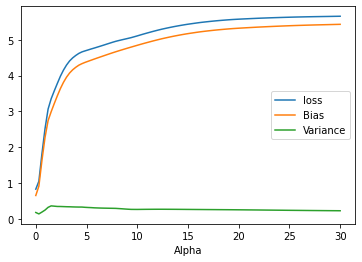

In [303]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.legend()

- $\lambda \downarrow$

    - $Bias\;\downarrow\;\;Overfit\;\;Variance\;\uparrow$
    
<br></br>    
- $\lambda \uparrow$

    - $Bias\;\uparrow\;\;Underfit\;\;Variance\;\downarrow$
    
    
    
$$\lambda\;\propto\;BIAS$$

$$\lambda\;\propto\;\frac{1}{VARIANCE}$$

### 4. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


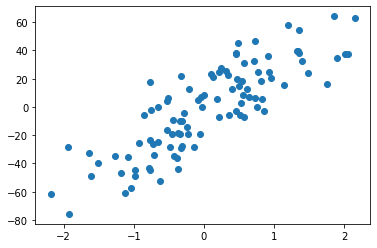

In [304]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [305]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)

In [306]:
def predict(m):
    return m*X - 2.29

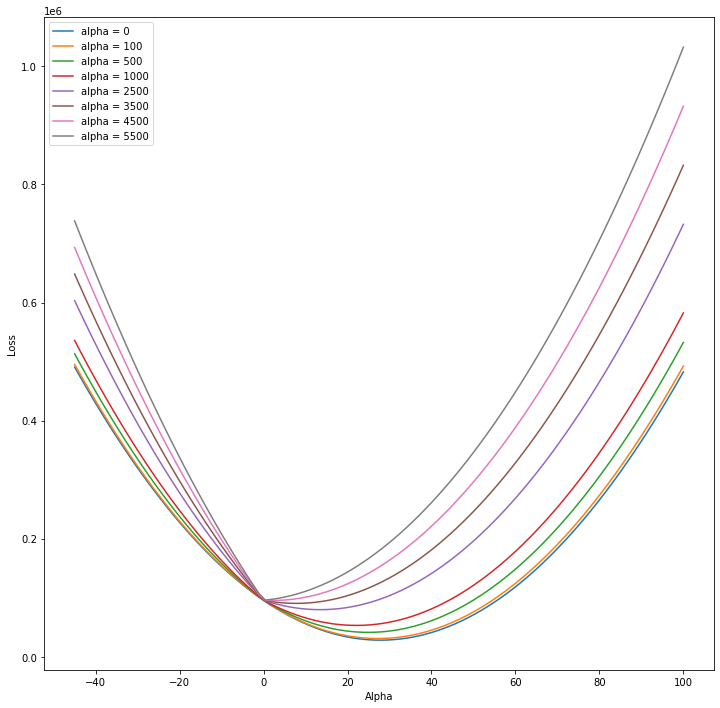

In [307]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500,3500,4500,5500]: # different values of alphas
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

**With increase in value of $\lambda\;(alpha)$ we can see that the coefficents are shrinking and becoming zero.**

#### Sparsity in Ridge

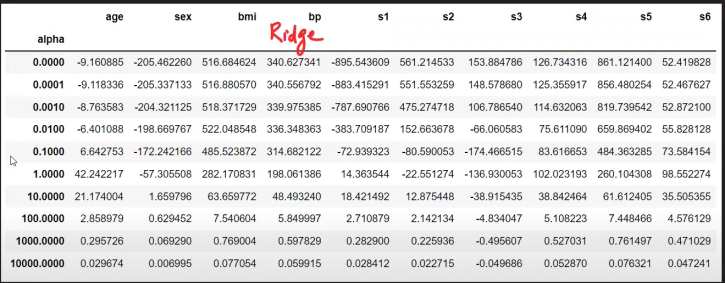

#### Sparsity_Lasso : 

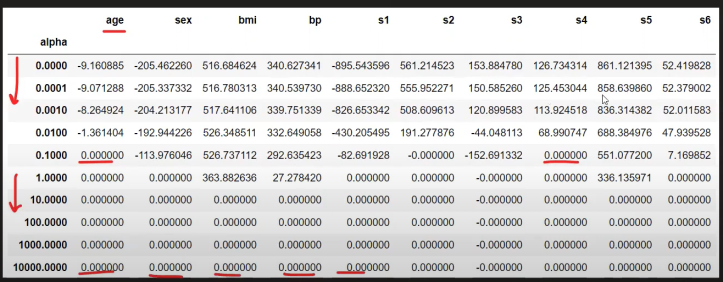

### Lasso :

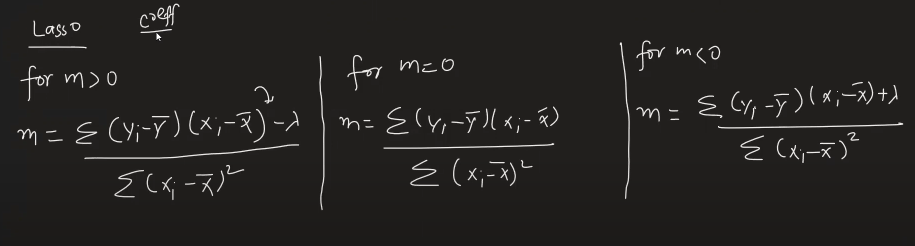

### ridge :

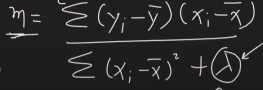

##### Why there is Sparcity in Lasso but not in Ridge?

In Ridge the $\lambda$ is in denominator and the fraction will only become zero when the numerator becomes zero.


But in Lasso $\lambda$ is in numerator so the fraction can become zero.

***

## ElasticNet Regression

$$Loss\;=\;\sum (y_{i}\;-\;\hat y_{i})^2\;+\;a\;||W||^2\;+\;b\;||W||$$


In Scikit-learn

- $\lambda\;=\;a\;+\;b$


- $l1-ratio\;=\;\frac{a}{a+b}$


accordingly 
- $a\;=\;l_{1} * \lambda$


- $b\;=\;\lambda\;-\;a$

#### NOTE: if your dataset has Multicollinearity then we apply ElasticNet

In [312]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [313]:
X,y = load_diabetes(return_X_y=True)

In [314]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [315]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [316]:
# Ridge 
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4519949419719548

In [317]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.44111855963110613

In [318]:
# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4531474541554823

***